ॐ श्री गणेशाय नम:

# California Housing Price Prediction

DESCRIPTION

**Background of Problem Statement :**

The US Census Bureau has published California Census Data which has 10 types of metrics such as the population, median income, median housing price, and so on for each block group in California. The dataset also serves as an input for project scoping and tries to specify the functional and nonfunctional requirements for it.

**Problem Objective:**
The project aims at building a model of housing prices to predict median house values in California using the provided dataset. This model should learn from the data and be able to predict the median housing price in any district, given all the other metrics.

Districts or block groups are the smallest geographocal units for which the US Census Bureau publishes sample data (a block group typically has a population of 600 to 3000 people). There are 20640 districts in the project dataset.

**Domain:** Finance and Housing

**Analysis Tasks to be performed:**
1.Build a model of housing prices to predict median house values in California using the provided dataset.

2.Train the model to learn from the data to predict the median housing price in any district, given all the other metrics.

3.Predict housing price based on median_income and plot the regression chart for it.

**1.Load the data:**

* Read the "housing.csv" file from the folder into the program.
* Print first few rows of this data.
* Extract input(X) and output(Y) data from the dataset.

**2.Handle missing values:**
* Fill the missing values with the mean of the respective column.

**3.Encode categorical data:**
* Convert categorical column in the dataset to numerical data.

**4.Split the dataset:**
* Split the data into 80% training dataset and 20% test dataset.

**5.Standarize data:**
* Standardize training and test dataset.

**6.Perform Linear Regression:**
* Perform Linear Regression on training data.
* Predict output for test dataset using the fitted model.
* Print root mean Squared error (RMSE) from Linear Regression. [HINT:Import mean_squared_error from sklearn.metrics ]

**7.Perform Decision Tree Regression:**
* Perform Decision Tree Regression on training data.
* Predict output for test_dataset using the fitted model.
* Print root mean squared error from Decision Tree Regression.

**8.Perform Random Forest Regression:**
* Perform Random Forest Regression on training data.
* Predict output for test dataset using the fitted model.
* Print RMSE (root mean squared error) from Random Forest Regression.

**9.Bonus exercise:Perform Linear Regression with one independent variable:**
* Extract just the median_income column from the independent variables (from X_train and X_test).
* Perform Linear Regression to predict housing values based on median_income.
* Predict output for test dataset using the fitted model.
* Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data.

##### Dataset Description:
| Field | Type    | Description |
| :---: |:---: |:--
| longitude |(Signed numeric - float) | Longitude value for the block in California, USA |
| latitude     |(numeric - float) | Latitude value for the block in California, USA |
| housing_median_age |(numeric-int)| Median age of the house in the block |
| total_rooms |(numeric-int) | Count of the total number of rooms (excluding bedrooms) in all houses in the block |
| total_rooms |(numeric-int) | Count of the total number of rooms (excluding bedrooms) in all houses in the block |
| total_bedrooms |(numeric - float)| Count of the total number of bedrooms in all houses in the block |
| population |(numeric-float) | Count of the total number of bedrooms in all houses in the block |
| households |(numeric - int) | Count of the total number of population in the block |
| median_income |(numeric - float) | Median of the total household income of all the houses in the block |
| ocean_proximity |(numeric - int) |Median of the household prices of all the houses in the use_value block |


In [104]:
#import the necessary libraries required 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn import metrics

In [105]:
df = pd.read_excel("housing.xlsx")

In [106]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [108]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [109]:
for item in df.columns:
    print(item,":", df[item].nunique())

longitude : 844
latitude : 862
housing_median_age : 52
total_rooms : 5926
total_bedrooms : 1923
population : 3888
households : 1815
median_income : 12928
ocean_proximity : 5
median_house_value : 3842


* **The 'Median house value' are continuous while 'ocean_proximity' are categorical**

In [110]:
#display scatter_matrix also
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
fig = plt.figure()
#scatter_matrix(df,figsize =(25,25),alpha=0.9,diagonal="kde",marker="o")

<Figure size 432x288 with 0 Axes>

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

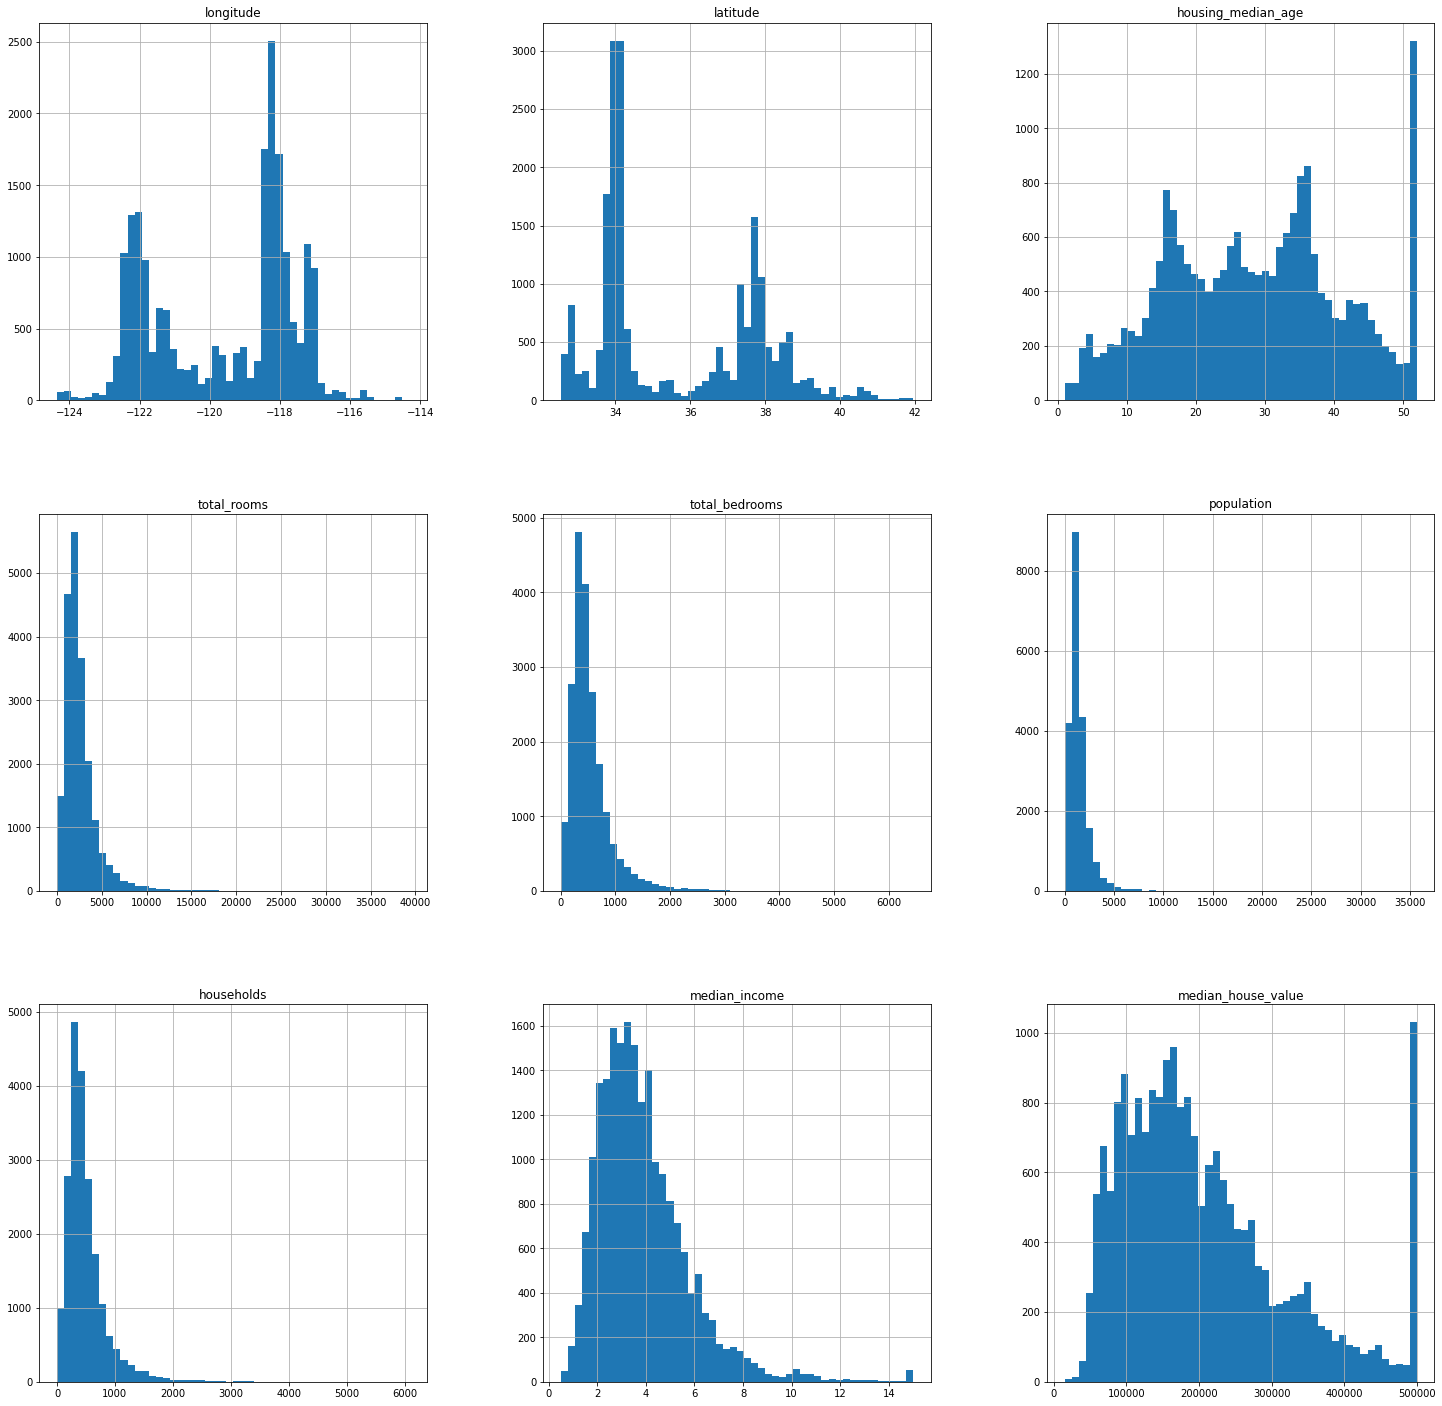

In [111]:
df.hist(figsize=(25,25),bins=50)

In [112]:
correlation= df.corr()
correlation.style.background_gradient()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


<AxesSubplot:>

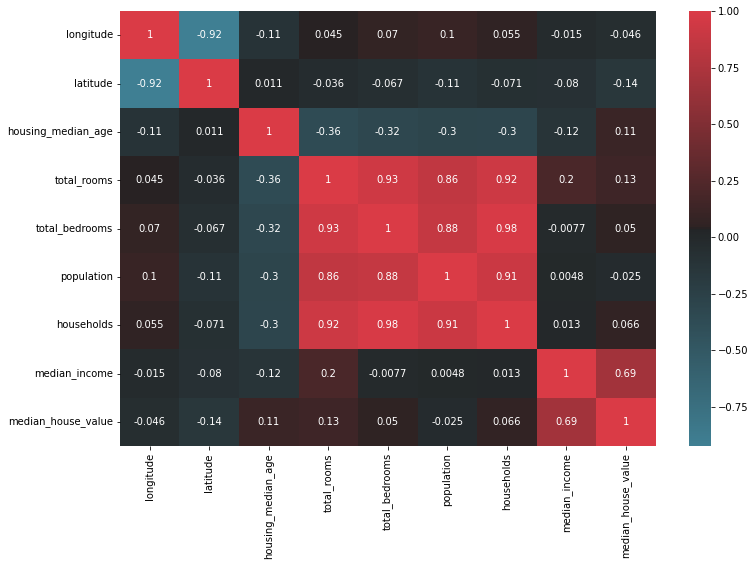

In [113]:
import seaborn as sns
fig=plt.figure(figsize=(12,8))
cmap = sns.diverging_palette(220, 10,center="dark", as_cmap=True)
sns.heatmap(correlation,cmap=cmap,square =False, annot=True)

In [114]:
df["total_bedrooms"].describe()

count    20433.000000
mean       537.870553
std        421.385070
min          1.000000
25%        296.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64

In [115]:
def getOutliers(dataframe,column):
    column = "total_rooms" 
    #housing[column].plot.box(figsize=(8,8))
    total_rooms = dataframe[column].describe()
    condition = {"count":0,"mean":1,"std":2,"min":3,"25":4,"50":5,"75":6,"max":7}
    Q1 = total_rooms[condition['25']]
    Q3 = total_rooms[condition['75']]
    IQR = Q3-Q1
    lowerBound = Q1-1.5*IQR
    upperBound = Q3+1.5*IQR
    print("(IQR = {})Outlier are anything outside this range: ({},{})".format(IQR,lowerBound,upperBound))
    #b = df[(df['a'] > 1) & (df['a'] < 5)]
    data = dataframe[(dataframe [column] < lowerBound) | (dataframe [column] > upperBound)]

    print("Outliers out of total = {} are \n {}".format(df[column].size,len(data[column])))
    #remove the outliers from the dataframe
    outlierRemoved = df[~df[column].isin(data[column])] #values is not in the DataFrame, use the ~ operator:
    return outlierRemoved

In [116]:
df_outliersRemoved = getOutliers(df,"total_rooms")
df_outliersRemoved

(IQR = 1700.25)Outlier are anything outside this range: (-1102.625,5698.375)
Outliers out of total = 20640 are 
 1287


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
5,-122.25,37.85,52,919,213.0,413,193,4.0368,NEAR BAY,269700
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700


In [117]:
df["total_bedrooms"].describe()

count    20433.000000
mean       537.870553
std        421.385070
min          1.000000
25%        296.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64

In [118]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [119]:
df['total_bedrooms'].unique

<bound method Series.unique of 0         129.0
1        1106.0
2         190.0
3         235.0
4         280.0
          ...  
20635     374.0
20636     150.0
20637     485.0
20638     409.0
20639     616.0
Name: total_bedrooms, Length: 20640, dtype: float64>

In [120]:
total_bedrooms_mode=df['total_bedrooms'].mode()
total_bedrooms_mode

0    280.0
Name: total_bedrooms, dtype: float64

<AxesSubplot:>

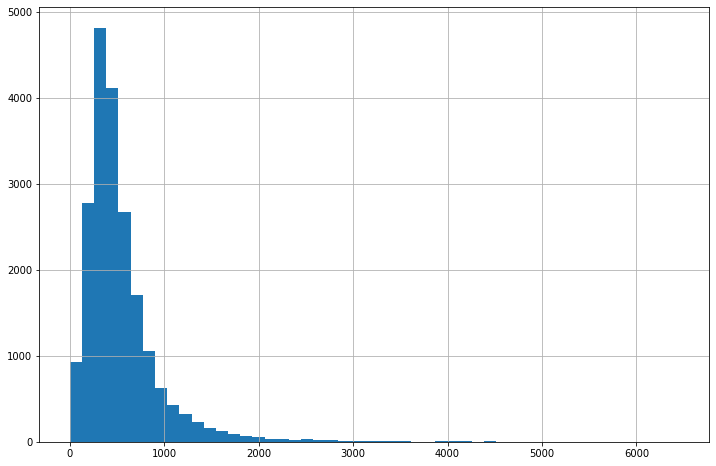

In [121]:
total_bedroms = df[df["total_bedrooms"].notnull()]["total_bedrooms"]  #["total_bedrooms"]
total_bedroms.hist(figsize=(12,8),bins=50)

In [122]:
from sklearn.impute import SimpleImputer

In [123]:
print(df[['total_bedrooms']])
#df.iloc[:,4:5].head() = df[['total_bedrooms']] SAME

       total_bedrooms
0               129.0
1              1106.0
2               190.0
3               235.0
4               280.0
...               ...
20635           374.0
20636           150.0
20637           485.0
20638           409.0
20639           616.0

[20640 rows x 1 columns]


In [124]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(df[['total_bedrooms']])


SimpleImputer(strategy='median')

In [125]:
df.iloc[:,4:5] = imputer.transform(df[['total_bedrooms']])

In [126]:
df.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
ocean_proximity       False
median_house_value    False
dtype: bool

In [127]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
le = LabelEncoder()

In [128]:
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [129]:
"""df.ocean_proximity= df.ocean_proximity.map({'NEAR BAY':0, '<1H OCEAN':1, 'INLAND':2, 'NEAR OCEAN':3, 'ISLAND':4})
df['ocean_proximity'].unique()"""


"df.ocean_proximity= df.ocean_proximity.map({'NEAR BAY':0, '<1H OCEAN':1, 'INLAND':2, 'NEAR OCEAN':3, 'ISLAND':4})\ndf['ocean_proximity'].unique()"

In [130]:
le.fit(df['ocean_proximity'])
df['ocean_proximity']=le.transform(df['ocean_proximity'])
df['ocean_proximity'].value_counts()

0    9136
1    6551
4    2658
3    2290
2       5
Name: ocean_proximity, dtype: int64

In [131]:
x =df.drop("median_house_value", axis=1)
y = df["median_house_value"]

**Split the dataset**

In [132]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [133]:
print(x_train.shape)
print(x_test.shape)

(16512, 9)
(4128, 9)


**Standardize training and test datasets.**

In [134]:
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_train


array([[-1.42250942,  0.97229046,  1.85890297, ..., -0.57159385,
        -0.36232605,  1.28811826],
       [-1.38265919,  1.08459626,  1.06434823, ..., -0.51668155,
        -0.14102329,  1.28811826],
       [-0.8297373 ,  1.06119922, -1.0014941 , ..., -1.29329827,
        -0.66144956, -0.1168232 ],
       ...,
       [ 0.65468363, -0.79652586,  1.06434823, ..., -0.54283026,
        -1.45044201, -0.81929393],
       [ 1.20262424, -0.89011402, -1.47822694, ..., -0.06169398,
        -0.65764311, -0.1168232 ],
       [-1.30794002,  1.00972573,  0.50815991, ..., -0.28918777,
        -0.83136525,  1.28811826]])

In [135]:
X_test = scaler.transform(x_test)
X_test

array([[ 0.60487084, -0.73569355,  0.82598181, ...,  0.32269207,
        -0.33102858, -0.81929393],
       [-0.10247067,  0.53710549,  0.66707086, ..., -0.16367395,
        -1.0032899 , -0.1168232 ],
       [-1.41752814,  0.98164928,  1.38217013, ..., -0.24734983,
         0.0724551 ,  1.28811826],
       ...,
       [-1.39262175,  0.92081697, -0.20693936, ..., -1.30114288,
         0.61952652,  1.99058899],
       [ 0.73438408, -0.72165533,  1.06434823, ..., -0.59512769,
         0.52806599, -0.81929393],
       [ 1.09303611, -0.76844941,  1.85890297, ..., -0.49053284,
        -0.61894421, -0.1168232 ]])

* **Apply Linear Regression**

In [136]:
lr=LinearRegression()
lr.fit(X_train, y_train)
print("Intercept is "+str(lr.intercept_)," & coefficients  is "+str(lr.coef_))

Intercept is 207735.0641957363  & coefficients  is [-85675.90751873 -90729.76887107  14625.07802937 -15782.79387437
  36467.93743051 -43901.60955479  27992.03951671  76210.79658835
    614.09535713]


In [137]:
lr_predict = lr.predict(X_test)
lr_predict

array([240651.85445272, 103520.6848257 , 250366.70728054, ...,
       280203.73002747, 259111.37376096, 158524.35811483])

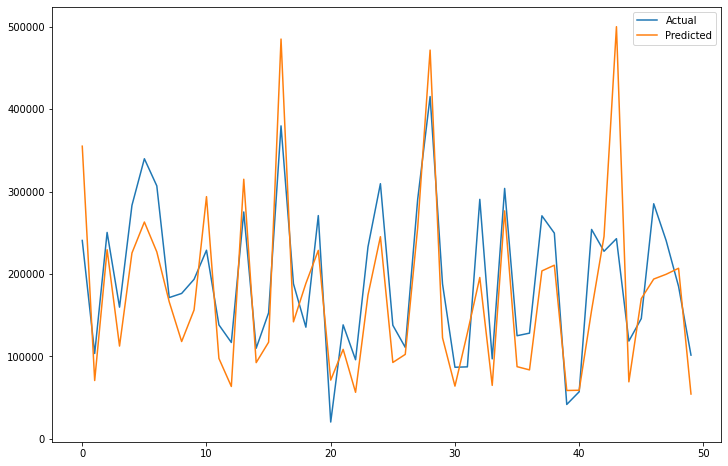

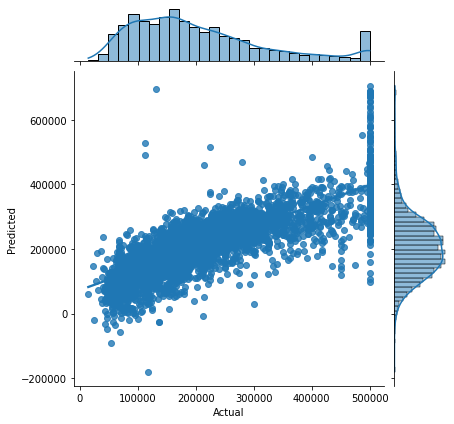

In [138]:
test = pd.DataFrame({'Predicted':lr_predict,'Actual':y_test})
fig= plt.figure(figsize=(12,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',)

In [139]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

rmse(lr_predict, y_test)


69878.9364337015

In [140]:
lr_rmse = np.sqrt(metrics.mean_squared_error(y_train,lr.predict(X_train)))
print("RMSE value for Linear regression is", lr_rmse)

RMSE value for Linear regression is 69615.91378585291


* **Apply Decision Tree Regression**

In [141]:
dtree = DecisionTreeRegressor(max_depth=9)
dtree .fit(X_train,y_train)

DecisionTreeRegressor(max_depth=9)

In [142]:
dtree_y_pred = dtree.predict(X_test)
dtree_y_pred

array([390626.05172414,  62306.85862786, 234711.53846154, ...,
       316061.53846154, 197430.71895425, 106877.7173913 ])

In [143]:
print(dtree_y_pred[0:5])
print(y_test[0:5])

[390626.05172414  62306.85862786 234711.53846154 132827.59770115
 251507.69230769]
4712     355000
2151      70700
15927    229400
82       112500
8161     225400
Name: median_house_value, dtype: int64


In [144]:
rmse=np.sqrt(mean_squared_error(y_test,dtree_y_pred))
rmse

60976.0902585396

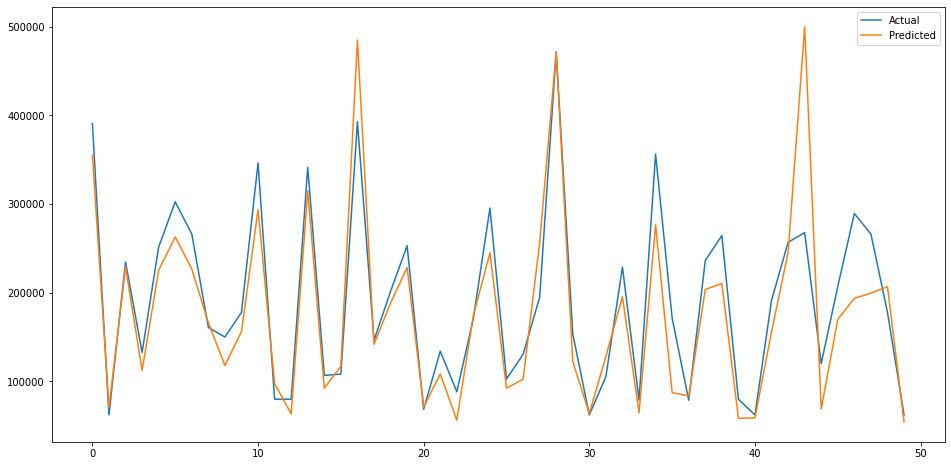

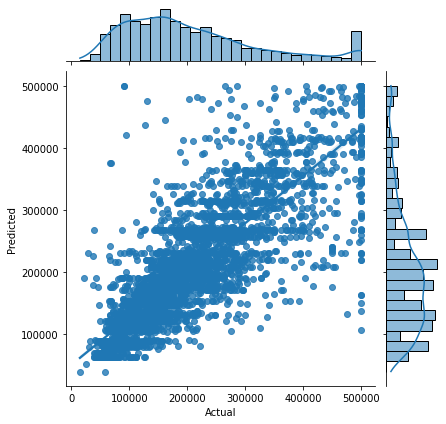

In [145]:
test = pd.DataFrame({'Predicted':dtree_y_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind="reg")

* **Perform Random Forest Regression**

In [146]:
rfReg = RandomForestRegressor()
rfReg.fit(X_train,y_train)

RandomForestRegressor()

In [147]:
rfReg_y_pred = rfReg.predict(X_test)
print(rfReg_y_pred[0:5])
print(y_test[0:5])

[335296.1   63473.   242614.   134937.06 240286.01]
4712     355000
2151      70700
15927    229400
82       112500
8161     225400
Name: median_house_value, dtype: int64


In [148]:
rmse_rf=np.sqrt(metrics.mean_squared_error(y_test,rfReg_y_pred))
rmse_rf

49114.22846440992

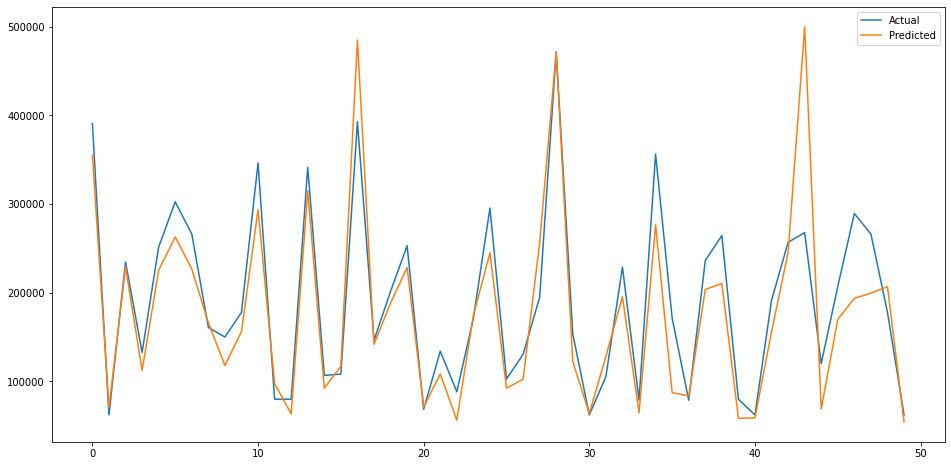

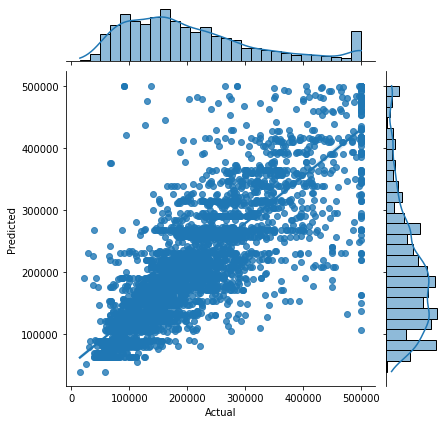

In [149]:
test = pd.DataFrame({'Predicted':dtReg_y_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind="reg")

* **Linear Regression with one independent Variable**


In [150]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [162]:
dropcol = ["longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households"]
x_new = df['ocean_proximity']
#x_new = df.drop(dropcol,axis=1)
x_new

0        3
1        3
2        3
3        3
4        3
        ..
20635    1
20636    1
20637    1
20638    1
20639    1
Name: ocean_proximity, Length: 20640, dtype: int32

In [168]:
X = np.array(x_new).reshape(-1, 1)
Y = np.array(y).reshape(-1, 1)

In [169]:
X_train2,X_test2,y_train2,y_test2 = train_test_split(X, Y ,test_size=0.2, random_state=53)

In [170]:
lr2 = LinearRegression()
lr2.fit(X_train2,y_train2)

LinearRegression()

In [172]:
lr2_pred = lr2.predict(X_test2)
print(len(lr2_pred))
print(len(y_test2))
print(lr2_pred[0:5])
print(y_test2[0:5])

4128
4128
[[219131.69147303]
 [205315.70352758]
 [198407.70955485]
 [198407.70955485]
 [226039.68544576]]
[[266900]
 [135300]
 [281300]
 [248300]
 [342700]]


In [174]:
test = pd.DataFrame({'Predicted':lr2_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg')

ValueError: Per-column arrays must each be 1-dimensional

Text(0, 0.5, ' Predicted median_house_value')

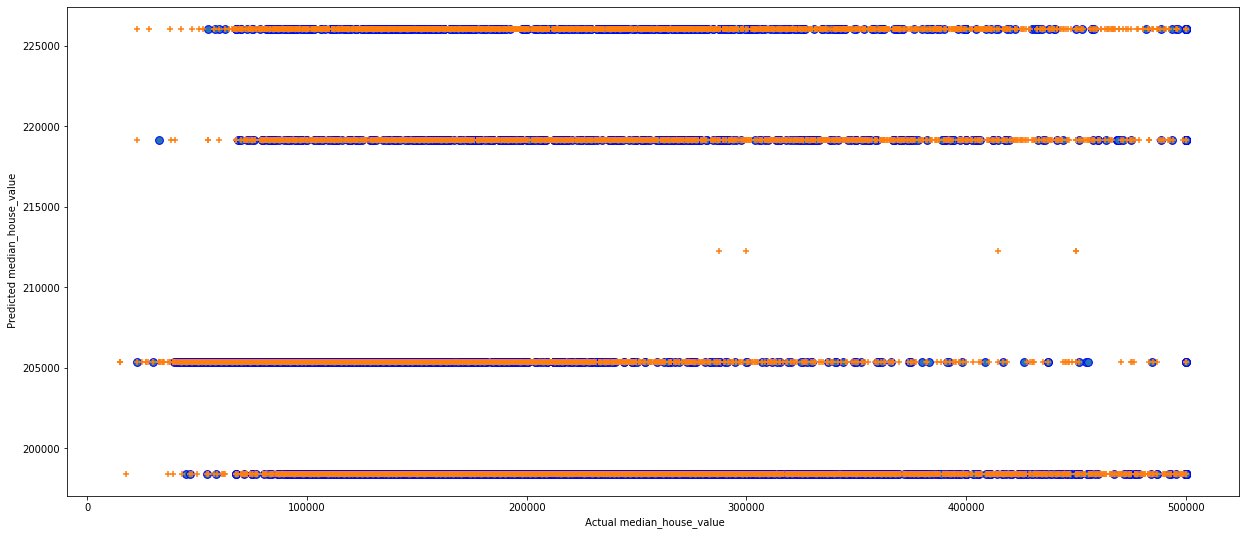

In [175]:
fig = plt.figure(figsize=(21,9))
plt.scatter(y_test2,lr2_pred,marker="o",edgecolors ="b",s=60)
plt.scatter(y_train2,lr2.predict(X_train2),marker="+",s=30,alpha=1)
plt.xlabel(" Actual median_house_value")
plt.ylabel(" Predicted median_house_value")

Summary
Observations : The median_income , totat_bedrooms have highly skewed data.The data is highly unbalance.